<a href="https://colab.research.google.com/github/kimdesok/3D-Mnist-3D-Convolution-3D-CNN/blob/main/MarketIndexTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-dataReader==0.5.0

In [2]:
import FinanceDataReader as fdr

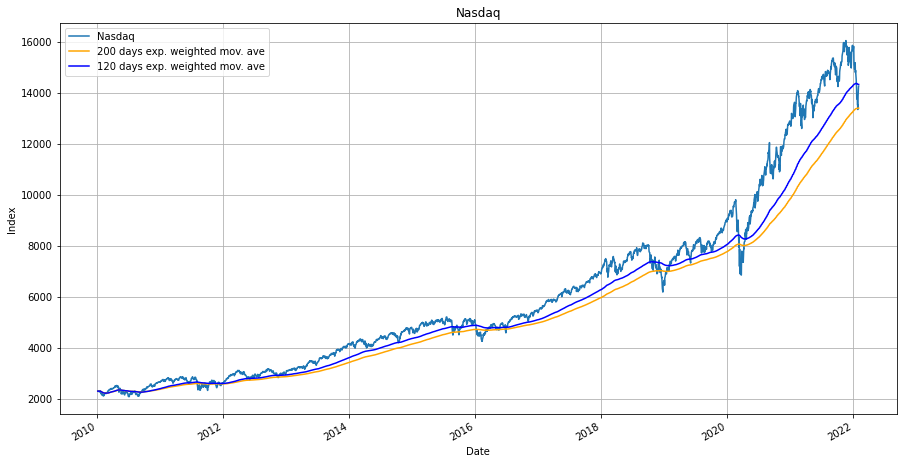

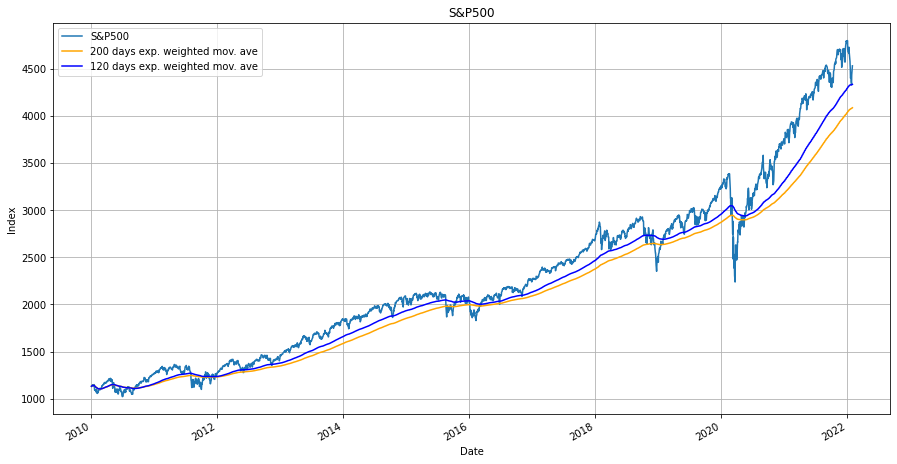

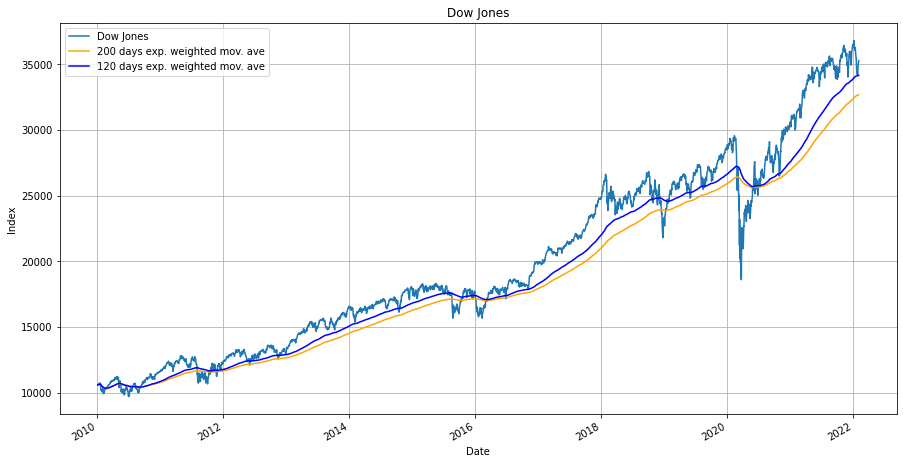

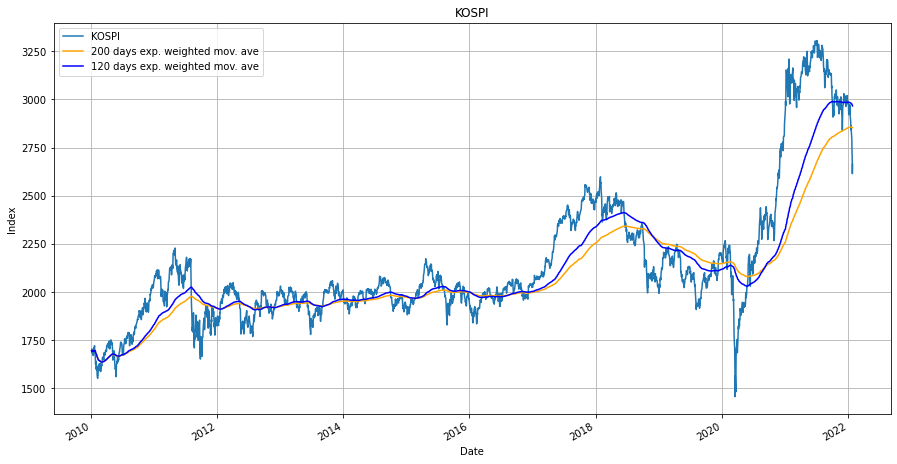

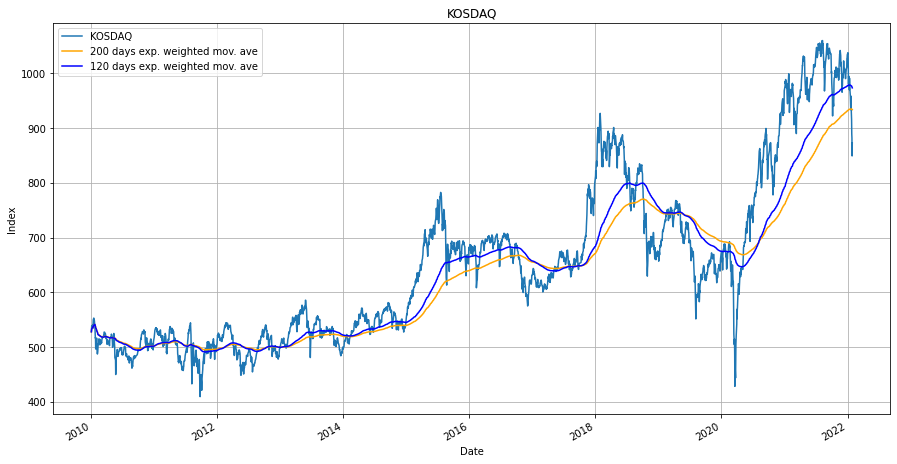

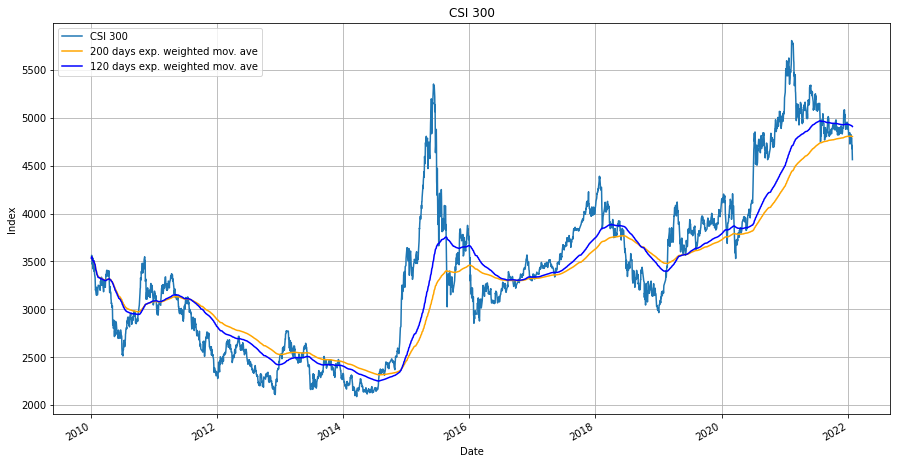

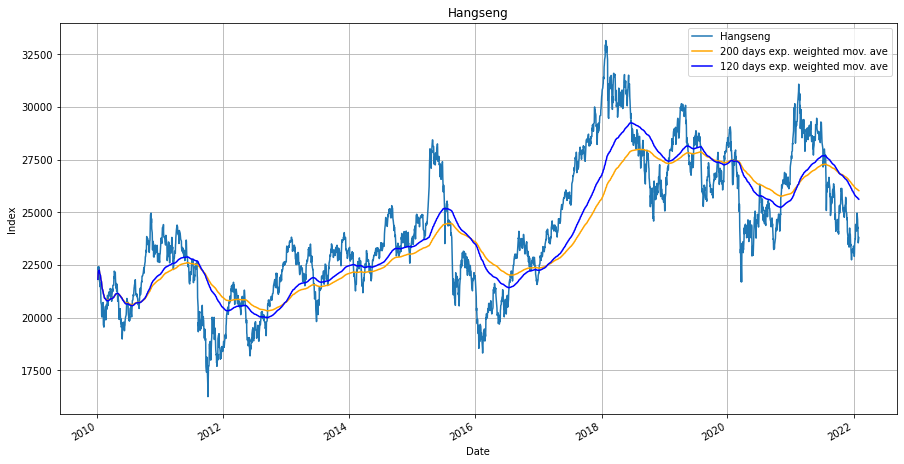

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

market_list = {'Nasdaq':'IXIC','S&P500':'US500', 'Dow Jones':'DJI', 'KOSPI':'KS11', 'KOSDAQ':'KQ11', 'CSI 300': 'CSI300', 'Hangseng':'HSI'	}

for name, code in market_list.items() :
  df = fdr.DataReader(code, data_source='fred')
  #df.info()

  #plt.figure(figsize=(10, 6))
  h0 = df['Close'].plot(label=name)
  h1 = df['Close'].ewm(200, min_periods=1).mean()
  h1.plot(color='orange', label='200 days exp. weighted mov. ave')
  h2 = df['Close'].ewm(120, min_periods=1).mean()
  h2.plot(color='blue', label='120 days exp. weighted mov. ave')
  plt.ylabel('Index')
  plt.title(name)
  plt.legend()
  plt.grid(True)
  plt.show()


Today is 2022-02-01


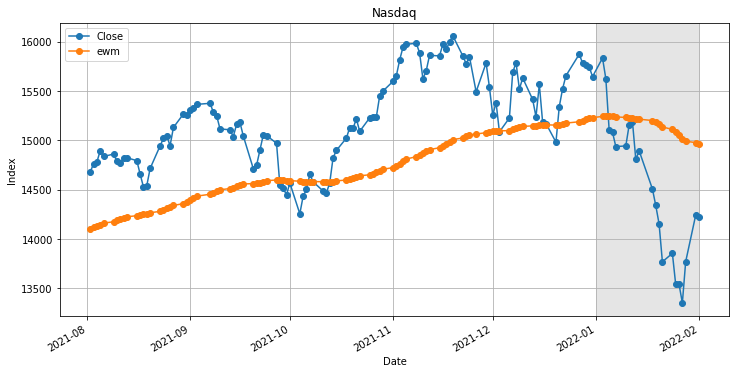

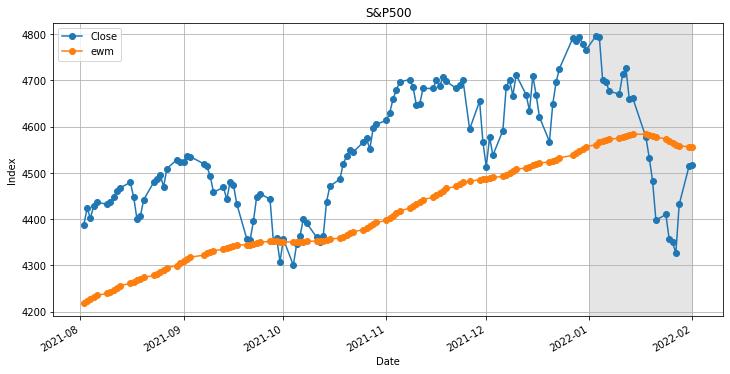

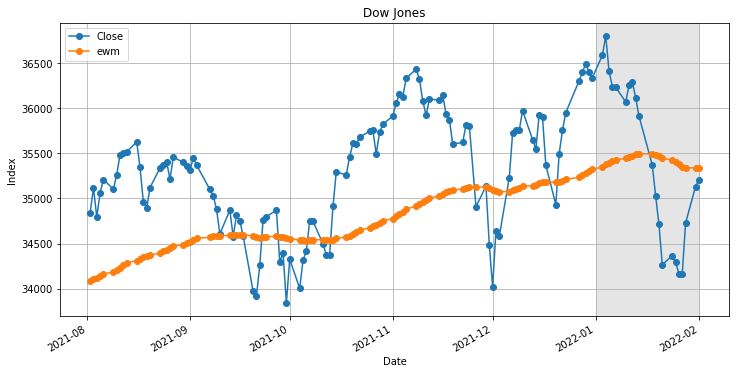

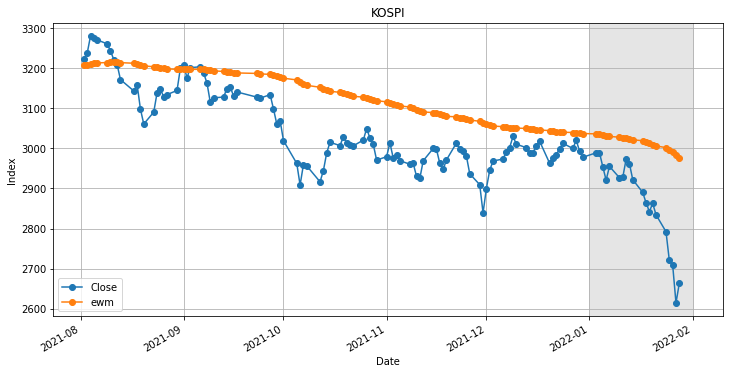

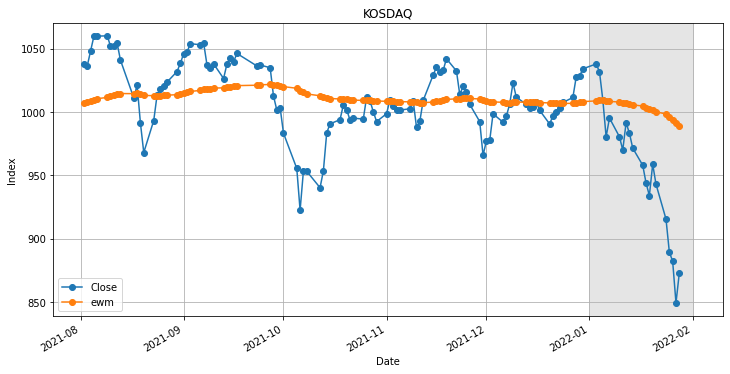

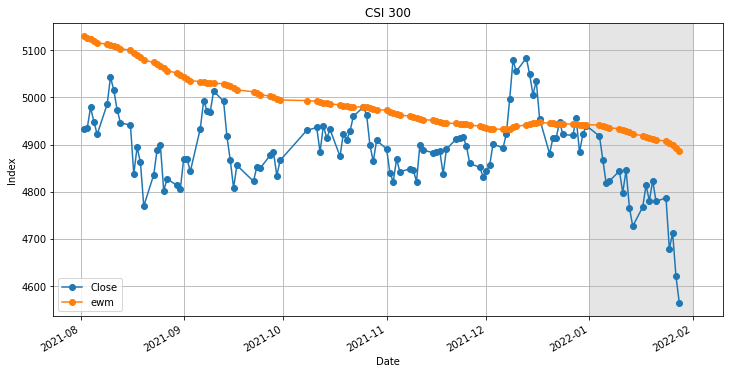

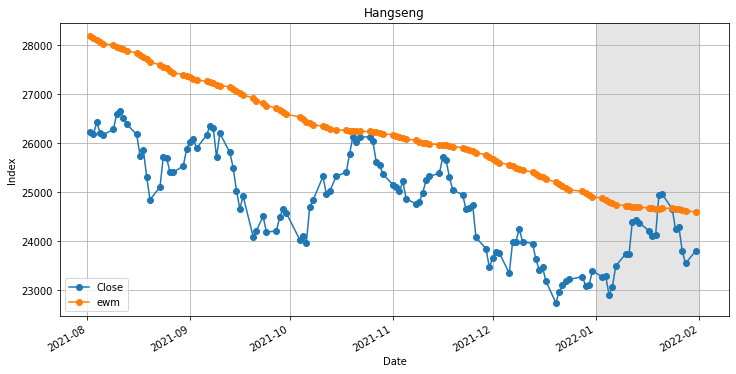

In [11]:
from datetime import date
end_date= date.today()
print("Today is " + str(end_date))

for name, code in market_list.items() :
  
  df = fdr.DataReader(code, start='2021', data_source='fred')
  df['ewm'] = df['Close'].ewm(50, min_periods=1).mean()
  df = df[['Close','ewm']]['2021-08-01':]
  ax = df.plot(marker='o')
  ax = ax.axvspan('2022-01-01', end_date, color='gray', alpha=0.2)
  
  plt.ylabel('Index')
  plt.title(name)
  plt.legend()
  plt.grid(True)
  plt.show()